In [1]:
import os
from pathlib import Path

project_root = Path.cwd().parent
if Path.cwd() != project_root:
    os.chdir(project_root)

In [2]:
from src.data_centric.dataCentricStrategy import DataCentricStrategy
from src.data_handling.datasetHandler import UCRDataset
from src.utils.configHandler import ConfigHandler

_config_handler = ConfigHandler()

base_path = _config_handler.DATASETS_PATH
ds_name = "Yoga"

dataset = UCRDataset(ds_name, path=base_path)
(
    X_train_raw,
    y_train_raw,
    X_test_raw,
    y_test_raw,
    meta,
) = dataset.load()

2025-07-24 15:22:44,808 - INFO - src.utils.configHandler - Initializing ConfigHandler with paths_yaml_path: configs/paths.yaml
2025-07-24 15:22:44,809 - INFO - src.utils.configHandler - Successfully loaded paths configuration from YAML file
2025-07-24 15:22:44,810 - INFO - src.data_handling.datasetHandler - Initialized UCRDataset with name: Yoga, path: Univariate_ts
2025-07-24 15:22:44,811 - INFO - src.data_handling.datasetHandler - Loading dataset: Yoga
2025-07-24 15:22:44,988 - INFO - src.data_handling.datasetHandler - Dataset Yoga loaded successfully


In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(os.path.join(os.getcwd(), "configs", "visualisations.mplstyle"))

def plot_data(X, y, y_gt, title):
    class_labels = np.unique(y)
    gt_colors = {'1': 'tab:blue', '2': 'tab:orange'}
    for row, cls in enumerate(class_labels):
        plt.subplot(2, 2, row + 1)
        idx = np.where(np.array(y) == cls)[0][:10]
        samples = X[idx].squeeze(1)
        for i, sample in enumerate(samples):
            gt_label = y_gt[idx[i]]
            plt.plot(sample, color=gt_colors.get(gt_label, 'gray'), alpha=0.7)
        plt.title(f"{title} - Class {cls}")
    plt.tight_layout()
    plt.show()

In [4]:
strategy = DataCentricStrategy.from_config({
    "type": "label_flipping",
    "mode": "random",
    "params": {
        "flip_ratio": 0.5,
    }
})
X_train, y_train = strategy.apply(X_train_raw, y_train_raw)

2025-07-24 15:22:45,189 - INFO - src.data_centric.dataCentricStrategy - Creating strategy from config: {'type': 'label_flipping', 'mode': 'random', 'params': {'flip_ratio': 0.5}}
2025-07-24 15:22:45,189 - INFO - src.data_centric.dataCentricStrategy - Strategy RandomLabelFlipping created successfully
2025-07-24 15:22:45,189 - INFO - src.data_centric.dataCentricStrategy - Initialized DataCentricStrategy base class
2025-07-24 15:22:45,190 - INFO - src.data_centric.dataCentricStrategy - Initialized RandomLabelFlipping with flip_ratio: 0.5
2025-07-24 15:22:45,190 - INFO - src.data_centric.dataCentricStrategy - Applying RandomLabelFlipping with flip_ratio: 0.5
2025-07-24 15:22:45,192 - INFO - src.data_centric.dataCentricStrategy - RandomLabelFlipping applied successfully: 150/300 labels flipped


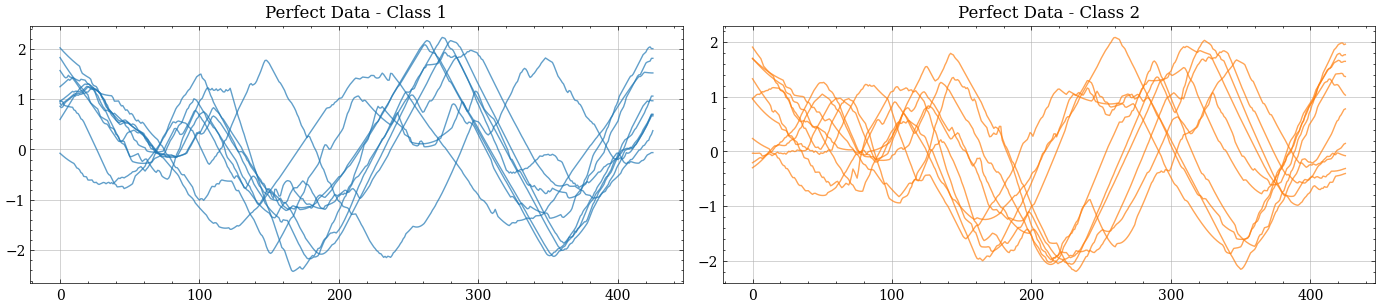

In [5]:
plot_data(X_train_raw, y_train_raw, y_train_raw, "Perfect Data")

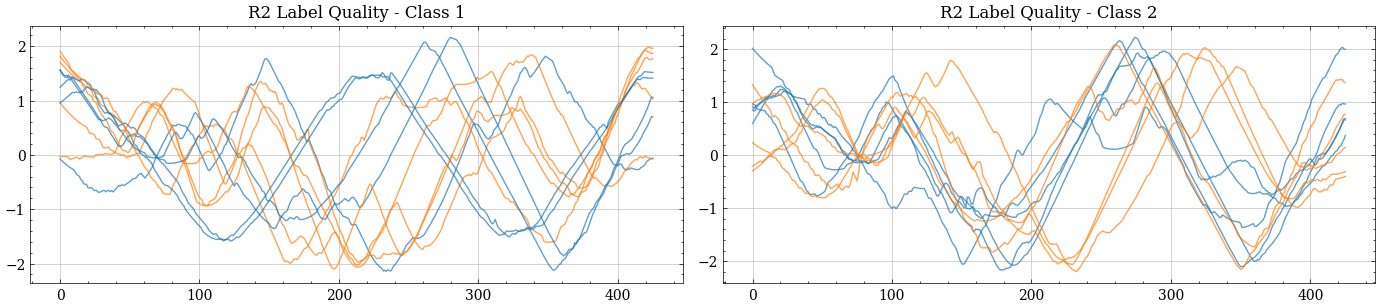

In [6]:
plot_data(X_train, y_train, y_gt=y_train_raw, title="R2 Label Quality")

In [7]:
strategy = DataCentricStrategy.from_config({
    "type": "feature_quality",
    "mode": "normal",
    "params": {
        "noise_level": 0.5,
    }
})
X_train, y_train = strategy.apply(X_train_raw, y_train_raw)

2025-07-24 15:22:45,581 - INFO - src.data_centric.dataCentricStrategy - Creating strategy from config: {'type': 'feature_quality', 'mode': 'normal', 'params': {'noise_level': 0.5}}
2025-07-24 15:22:45,582 - INFO - src.data_centric.dataCentricStrategy - Strategy FeatureQualityStrategy created successfully
2025-07-24 15:22:45,582 - INFO - src.data_centric.dataCentricStrategy - Initialized DataCentricStrategy base class
2025-07-24 15:22:45,583 - INFO - src.data_centric.dataCentricStrategy - Initialized FeatureQualityStrategy with noise_level: 0.5, mode: normal
2025-07-24 15:22:45,584 - INFO - src.data_centric.dataCentricStrategy - Applying FeatureQualityStrategy with noise_level: 0.5, mode: normal
2025-07-24 15:22:45,586 - INFO - src.data_centric.dataCentricStrategy - FeatureQualityStrategy applied successfully. Noise std: 0.4998, Output shape: (300, 1, 426)


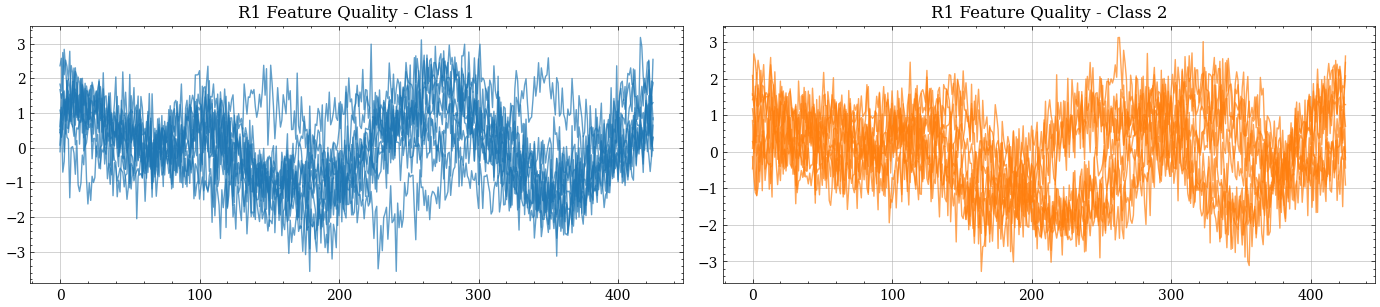

In [8]:
plot_data(X_train, y_train, y_gt=y_train_raw, title="R1 Feature Quality")

In [9]:
strategy = DataCentricStrategy.from_config({
    "type": "length_reduction",
    "mode": "random",
    "params": {
        "reduction_fraction": 0.5,
    }
})
X_train, y_train = strategy.apply(X_train_raw, y_train_raw)

2025-07-24 15:22:45,796 - INFO - src.data_centric.dataCentricStrategy - Creating strategy from config: {'type': 'length_reduction', 'mode': 'random', 'params': {'reduction_fraction': 0.5}}
2025-07-24 15:22:45,799 - INFO - src.data_centric.dataCentricStrategy - Strategy LengthReductionStrategy created successfully
2025-07-24 15:22:45,803 - INFO - src.data_centric.dataCentricStrategy - Initialized DataCentricStrategy base class
2025-07-24 15:22:45,804 - INFO - src.data_centric.dataCentricStrategy - Initialized LengthReductionStrategy with reduction_fraction: 0.5, take_from_end: True
2025-07-24 15:22:45,804 - INFO - src.data_centric.dataCentricStrategy - Applying LengthReductionStrategy with reduction_fraction: 0.5
2025-07-24 15:22:45,805 - INFO - src.data_centric.dataCentricStrategy - LengthReductionStrategy applied successfully: 213/426 timesteps kept, remaining positions filled with zeros. Output shape: (300, 1, 426)


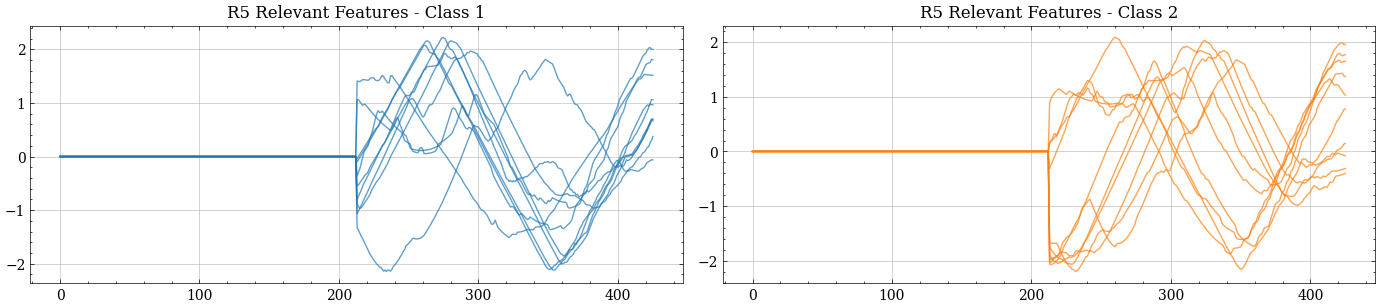

In [10]:
plot_data(X_train, y_train, y_gt=y_train_raw, title="R5 Relevant Features")